![alt text](https://i.imgur.com/1WaY7aA.png)

---



---



#  Data Science and AI
## Lab 6.2: K-Means bad cases

INSTRUCTIONS:

- Replace the `___` with proper code to run the cells
- Observe and understand the results
- Answer the questions

In [1]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# from sklearn import datasets
from sklearn.datasets import make_circles
import seaborn as sbn

In [2]:
## Create data points (circles)

# Load the Wine dataset from sklearn
X1, Y1 = make_circles(n_samples = 400, factor = 0.3, noise = 0.05)

In [3]:
## Convert data into a DataFrame

# Declare the columns names
columns = 'A B'.split()

# Load the dataset as a pandas data frame
X = pd.DataFrame(X1, columns = columns)

In [4]:
## Check data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 400 rows and 2 columns
Basic Statistics about X__________________________________________________
                A           B
count  400.000000  400.000000
mean     0.002481   -0.003920
std      0.522804    0.526094
min     -1.116032   -1.062368
25%     -0.270253   -0.296840
50%      0.002013    0.001101
75%      0.290426    0.294667
max      1.099534    1.108014

Sample of X__________________________________________________
          A         B
0 -0.012962  0.340437
1 -0.187591 -0.239806
2 -0.187561 -0.132824
3  0.293733 -0.271898
4 -0.145616  0.294902


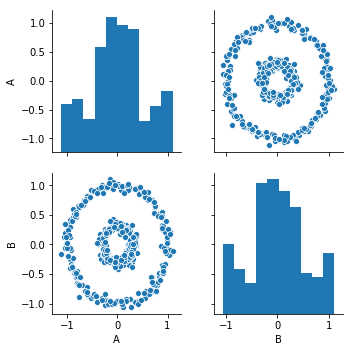

In [5]:
sbn.pairplot(X)
plt.show()

### Question: What are other important things to know about the data? Comment on:
- **Types** There are two numerical features.
- **Availability** There are 400 measurements
- **Dispersion and Distribution** There are up to 3 peaks in the distribution with a correlation between the two features that appears like a image of a target. Two concentric circles.

### Question: Which features could/should be used to cluster the data points?

There is no clear linear relationship between the features. The features could only be used after they are transformed.

In [6]:
## Create some supporting functions

# Create new centroids randomly for all the K clusters including all dimensions
def create_centroids(K, features):
    # start with No centroids
    centroids = []
    # need one centroid for each cluster
    for i in range(K):
        # it can be multi-dimensional
        dimensions = []
        for f in features:
            # create a random number between the minimum and maximum of each feature
            x = np.random.uniform(X[f].min(), X[f].max())
            dimensions.append(x)
        # add all dimensions for the centroids of each cluster
        centroids.append(dimensions)

    return centroids

In [7]:
# Identify the closest centroid for a given data point
def closest_centroid(x, centroids):
    distances = []
    # convert x to a numpy.array; x contains all the features of a data point
    p = np.array(x)
    for c in centroids:
        # convert c to a numpy.array; c contains the coordinates for all the features
        q = np.array(c)
        # calculate the Euclidean distance between data point `x` and centroid `c`
        d = np.sqrt( ( (p - q) ** 2 ).sum() )
        # add the distance for each centroid
        distances.append(d)

    # return the position (cluster) which has the smallest distance
    return np.array(distances).argmin()

In [8]:
# recalculate all the centroids based on the mean of the members of each cluster
def update_centroid(X, y, centroids):
    c = []
    # for each of the existing centroids
    for i in range(len(centroids)):
        # check if any object was assigned to a cluster
        if X[y == i].shape[0]:
            dimensions = []
            # for all the features
            for f in X.columns:
                # calculate the mean
                x = X[f][y == i].mean()
                dimensions.append(x)
            c.append(dimensions)
        # if a cluster got no members
        else:
            # keep the previous coordinates
            c.append(centroids[i])

    return c

In [9]:
# plot a chart of the data points and centroids either generic or identifying the clusters
# NOTE: for visualisation purposes, only consider the first two features
def plot_data(ax, X, y, centroids, show_clusters = True):
    # unpack the coordinates of the centroids
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]

    # show distinct colours if asked to identify the clusters
    if show_clusters:
        colours = 'rgbykcm'
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], c = colours[i], label = 'Cluster %d' % i)
    # show data points without cluster identification
    else:
        ax.scatter(X[features[0]], X[features[1]], label = 'Data Point')
        
    # label the features
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    # identify the centroids
    ax.scatter(a, b, c = 'k', linewidths = 5, marker = 'x', label = 'Centroid')
    for i in range(len(a)):
        c = colours[i] if show_clusters else 'k'
        ax.axvline(x = a[i], color = c, linestyle = '--', linewidth = 1)
        ax.axhline(y = b[i], color = c, linestyle = '--', linewidth = 1)

    # create a text to show the centroids' coordinates
    t = '\n'.join(['%d: (%.3f, %.3f)' % (i, a, b) for (i, (a, b)) in enumerate(centroids)])
    ax.text(0.69, -1.1, t)

    ax.legend()

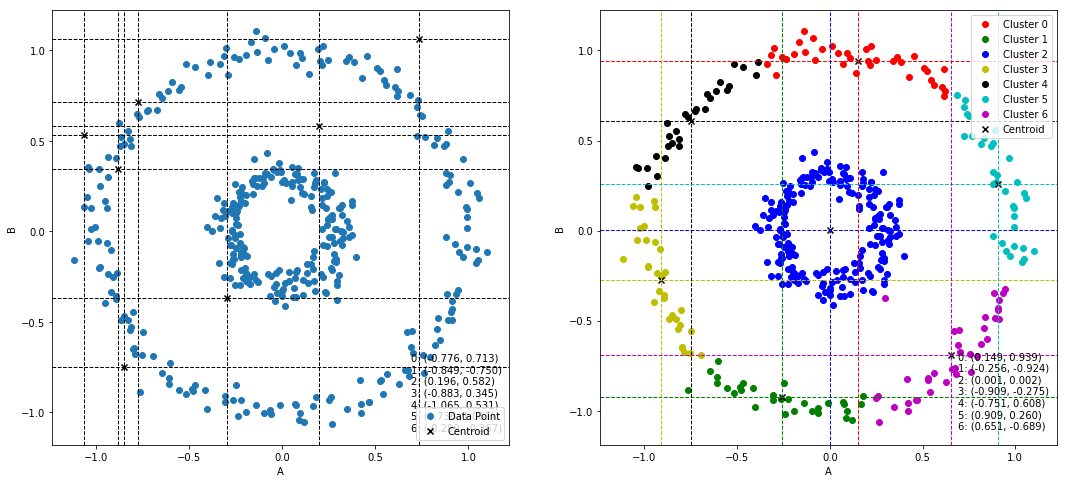

In [10]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 7 # choose different values for `K`

# list the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)

# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# repeat util makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values

    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break

# plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()

### Question: What happens if the algorithm is run multiple times?

The cluster descriptions (centres) change because the intial centres are chosen at random.

### Question: What happens if `K` is changed?

The centre of circle is identified as a single cluster with the remaining clusters spread out into the outside circle.




---



---



> > > > > > > > > © 2019 Data Science Institute of Australia


---



---



